coin_image max 255
coin_image min 0
pencil_image max 247
pencil_image min 0


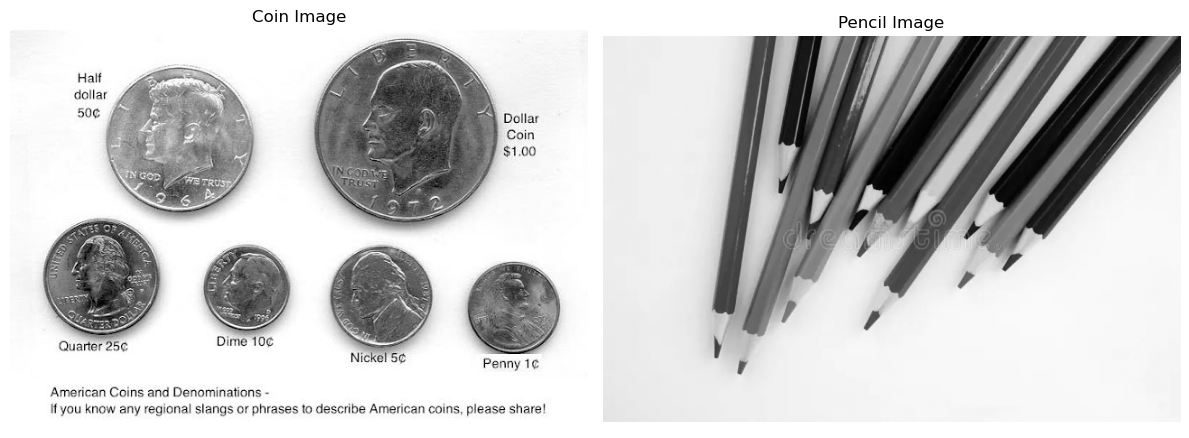

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Great article about the hough transform using open cv, cv2
# https://pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/

# https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert
# Load and convert images to grayscale
coin_image = Image.open("coin_image.jpg").convert("L")
pencil_image = Image.open("pencils_image.jpg").convert("L")

# Convert the images to NumPy arrays
coin_image_array = np.array(coin_image, dtype=np.uint8)
pencil_image_array = np.array(pencil_image, dtype=np.uint8)

# Print min and max values for coin image
print("coin_image max", coin_image_array.max())
print("coin_image min", coin_image_array.min())

print("pencil_image max", pencil_image_array.max())
print("pencil_image min", pencil_image_array.min())

# Create a figure with 1 row and 2 columns for the images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display the first image with a title on top
axs[0].imshow(coin_image_array, cmap='gray')
axs[0].set_title("Coin Image")
axs[0].axis('off')  # Turn off axis labels

# Display the second image with a title on top
axs[1].imshow(pencil_image_array, cmap='gray')
axs[1].set_title("Pencil Image")
axs[1].axis('off')  # Turn off axis labels

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


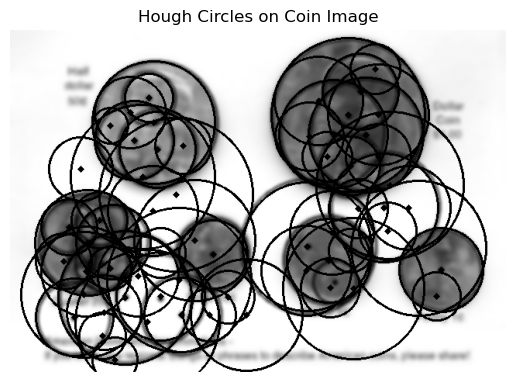

In [70]:
# Performed the follwong steps:
# 1. Gaussian Blur to reduce noise
# 2. Hough Transform to detect circles

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Apply Gaussian Blur to reduce noise
coin_image_array = cv2.GaussianBlur(coin_image_array, (9, 9), 2)

# Detect circles using Hough Transform
circles = cv2.HoughCircles(coin_image_array, 
                           cv2.HOUGH_GRADIENT, 
                           dp=1.2, 
                           minDist=30,
                           param1=100, 
                           param2=30, 
                           minRadius=20, 
                           maxRadius=100)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(coin_image_array, center, 2, (0, 255, 0), 3)  # Center
        cv2.circle(coin_image_array, center, radius, (0, 0, 255), 2)  # Perimeter

# Convert BGR to RGB for matplotlib display
img_rgb = cv2.cvtColor(cv2.merge([coin_image_array] * 3), cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.title("Hough Circles on Coin Image")
plt.axis("off")
plt.show()

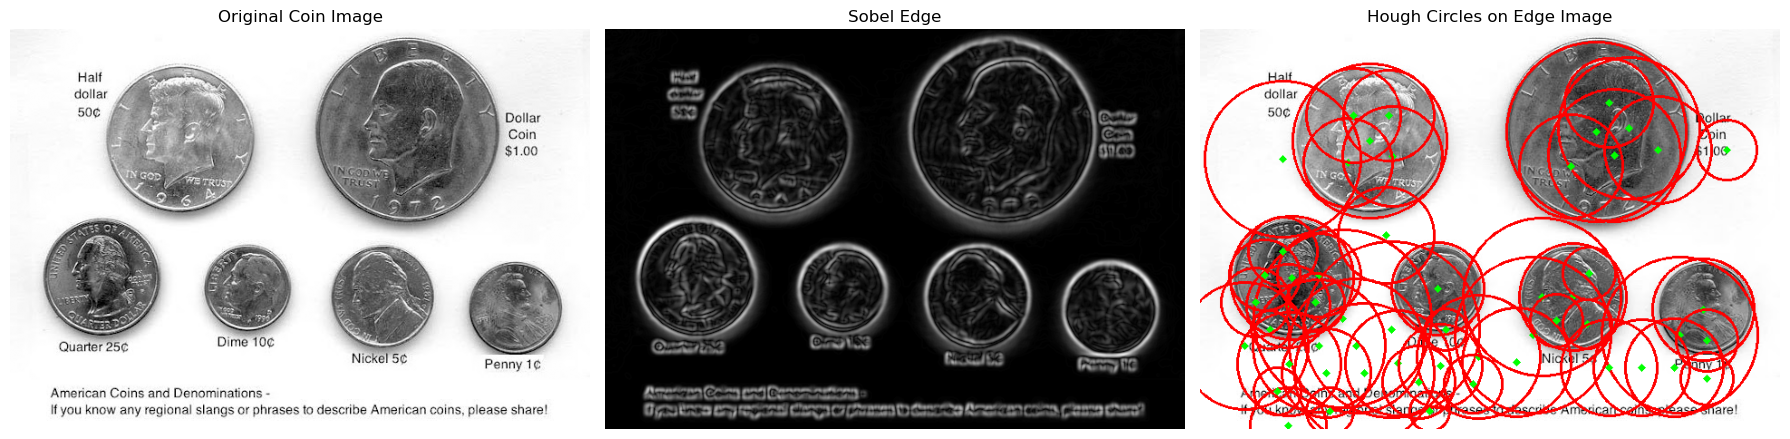

In [32]:
# Performed the follwong steps:
# 1. Gaussian Blur to reduce noise
# 2. Sobel edge detection
# 3. Binary thresholding
# 4. Hough Transform to detect circles

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# --- Load and Prepare the Image ---
coin_image = Image.open("coin_image.jpg").convert("L")
coin_image_array = np.array(coin_image, dtype=np.uint8)

# Optionally, apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(coin_image_array, (9, 9), 2)

# --- Built-in Sobel Edge Detection ---
# Compute the Sobel gradients in X and Y directions.
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Convert gradients to absolute values and then to uint8.
abs_sobel_x = cv2.convertScaleAbs(sobel_x)
abs_sobel_y = cv2.convertScaleAbs(sobel_y)

# Combine the two gradients to get the overall edge image.
edge_image = cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

# threshold the edge image to create a binary image.
_, edge_thresh = cv2.threshold(edge_image, 50, 255, cv2.THRESH_BINARY)

# --- Hough Circle Detection ---
# Use the thresholded edge image as input for Hough Circle detection.
circles = cv2.HoughCircles(edge_thresh, cv2.HOUGH_GRADIENT,
                           dp=1.2, minDist=30,
                           param1=50, param2=30,
                           minRadius=20, maxRadius=100)

# Create a color copy of the original image for drawing detected circles.
coin_image_color = cv2.cvtColor(coin_image_array, cv2.COLOR_GRAY2BGR)

# If circles are detected, draw them.
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        # Draw the circle center in green.
        cv2.circle(coin_image_color, center, 2, (0, 255, 0), 3)
        # Draw the circle perimeter in red.
        cv2.circle(coin_image_color, center, radius, (0, 0, 255), 2)

# --- Display the Results ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(coin_image_array, cmap="gray")
axs[0].set_title("Original Coin Image")
axs[0].axis("off")

axs[1].imshow(edge_image, cmap="gray")
axs[1].set_title("Sobel Edge")
axs[1].axis("off")

axs[2].imshow(cv2.cvtColor(coin_image_color, cv2.COLOR_BGR2RGB))
axs[2].set_title("Hough Circles on Edge Image")
axs[2].axis("off")

plt.tight_layout()
plt.show()


[[[186.6      120.600006  83.      ]
  [409.80002  294.6       60.2     ]
  [103.8      274.2       70.880005]
  [432.6      108.600006  99.32    ]
  [551.4      306.6       49.760002]
  [258.6      282.6       47.600002]]]


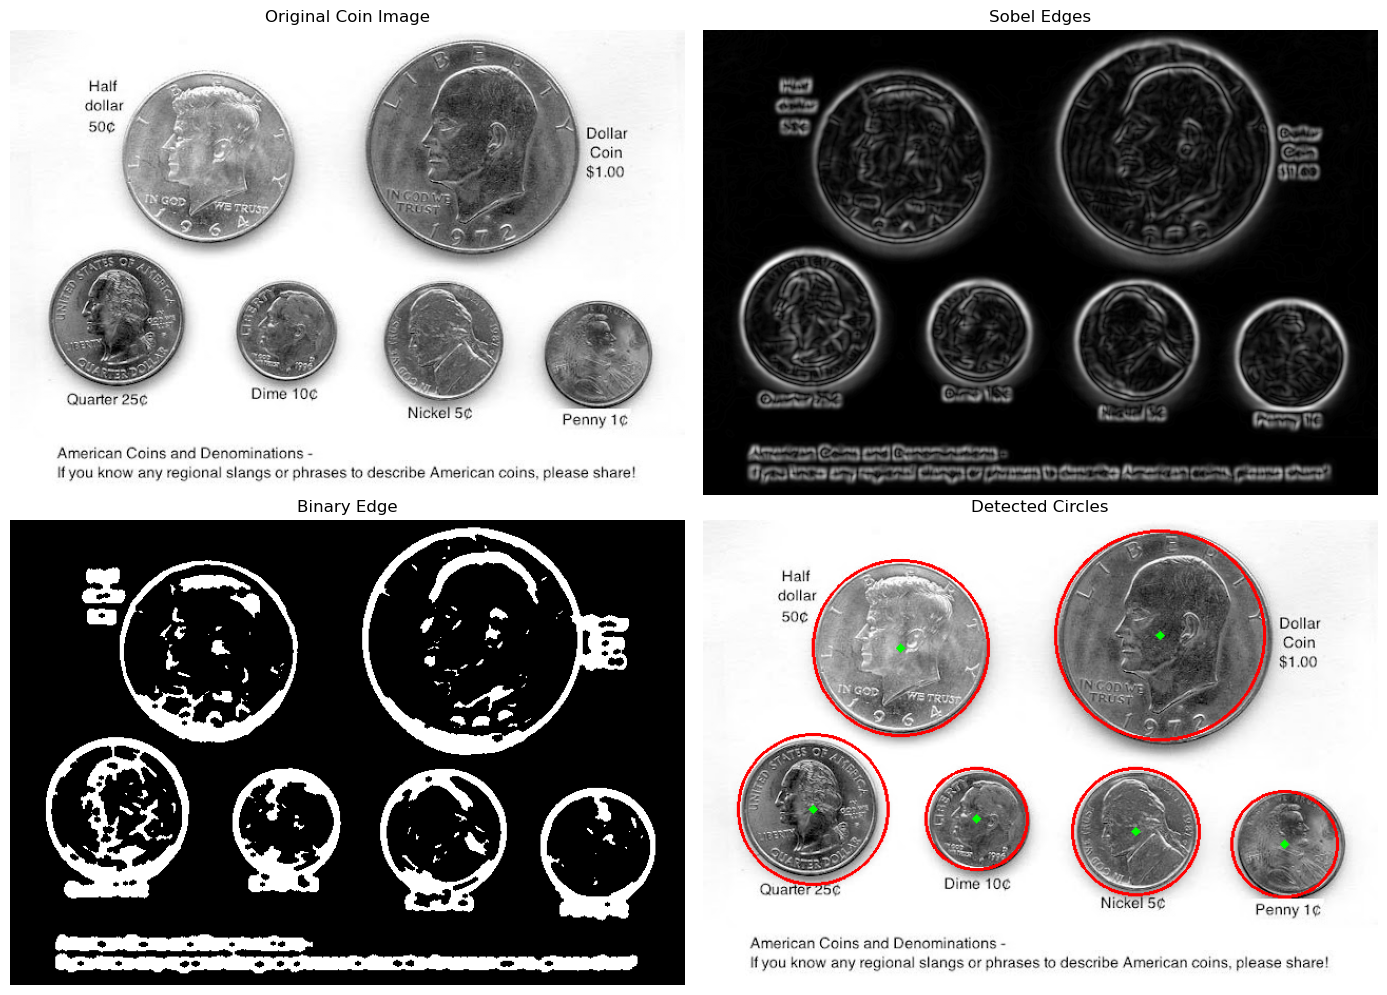

In [34]:
# Performed the follwong steps:
# 1. Gaussian Blur to reduce noise
# 2. Sobel edge detection
# 3. Binary thresholding
# 4. Dilation - Morphological Closing to Fill Gaps in the Edges
# 5. Hough Transform to detect circles

import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Load and Prepare the Image ---
coin_image = cv2.imread("coin_image.jpg", cv2.IMREAD_GRAYSCALE)
if coin_image is None:
    raise FileNotFoundError("Could not load coin_image.jpg")

# Apply Gaussian Blur to reduce noise.
blurred = cv2.GaussianBlur(coin_image, (9, 9), 2)

# --- Built-in Sobel Edge Detection ---
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
abs_sobel_x = cv2.convertScaleAbs(sobel_x)
abs_sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_combined = cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

# --- Binary Thresholding ---
_, binary_edge = cv2.threshold(sobel_combined, 40, 255, cv2.THRESH_BINARY)

# --- Morphological Closing to Fill Gaps in the Edges ---
# A larger elliptical kernel can help join broken edge segments.
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed_edges = cv2.morphologyEx(binary_edge, cv2.MORPH_CLOSE, kernel)

# --- Hough Circle Detection ---
# https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html
circles = cv2.HoughCircles(closed_edges, cv2.HOUGH_GRADIENT,
                           dp=1.2, minDist=30,
                           param1=25, param2=50,
                           minRadius=20, maxRadius=100)

print(circles)

# Draw the detected circles on a color copy of the original image.
output_image = cv2.cvtColor(coin_image, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        # Draw the center of the circle in green.
        cv2.circle(output_image, center, 2, (0, 255, 0), 3)
        # Draw the perimeter of the circle in red.
        cv2.circle(output_image, center, radius, (0, 0, 255), 2)

# --- Display the Results ---
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].imshow(coin_image, cmap="gray")
axs[0, 0].set_title("Original Coin Image")
axs[0, 0].axis("off")

axs[0, 1].imshow(sobel_combined, cmap="gray")
axs[0, 1].set_title("Sobel Edges")
axs[0, 1].axis("off")

axs[1, 0].imshow(closed_edges, cmap="gray")
axs[1, 0].set_title("Binary Edge")
axs[1, 0].axis("off")

axs[1, 1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("Detected Circles")
axs[1, 1].axis("off")

plt.tight_layout()
plt.show()


Circle at (438, 114) with radius 100 has 505.0 votes
Circle at (187, 122) with radius 82 has 463.0 votes
Circle at (101, 274) with radius 66 has 376.0 votes
Circle at (411, 295) with radius 58 has 313.0 votes
Circle at (557, 308) with radius 52 has 304.0 votes
Circle at (262, 286) with radius 50 has 288.0 votes


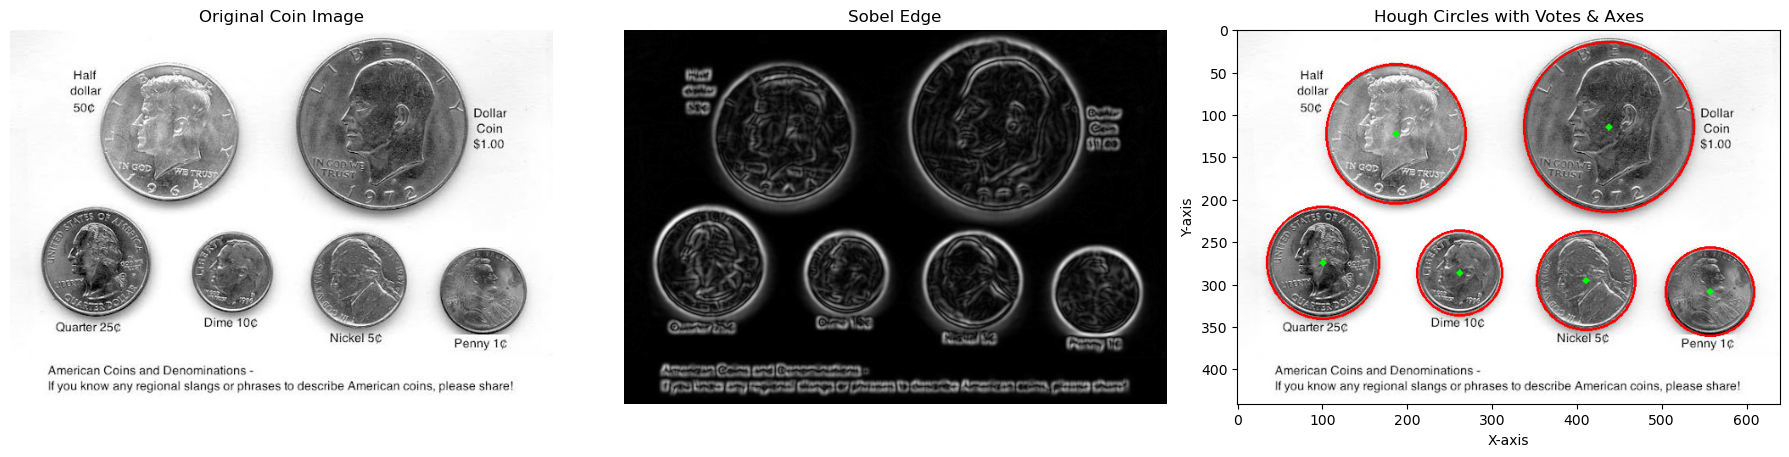

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import hough_circle, hough_circle_peaks

# --- Load and Prepare the Image ---
coin_image = Image.open("coin_image.jpg").convert("L")
coin_image_array = np.array(coin_image, dtype=np.uint8)

blurred = cv2.GaussianBlur(coin_image_array, (9, 9), 2)

# --- Built-in Sobel Edge Detection ---
# Compute the Sobel gradients in X and Y directions
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Convert gradients to absolute values and then to uint8
abs_sobel_x = cv2.convertScaleAbs(sobel_x)
abs_sobel_y = cv2.convertScaleAbs(sobel_y)

# Combine the two gradients to get the overall edge image
edge_image = cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

# Threshold the edge image to create a binary image
_, edge_thresh = cv2.threshold(edge_image, 50, 255, cv2.THRESH_BINARY)

# --- Hough Circle Detection using scikit-image ---
# Define the range of radii to search for
radii = np.arange(20, 101, 1)  # From 20 to 100, step of 1

# Compute the Hough Transform for the specified radii
hough_res = hough_circle(edge_thresh, radii, normalize=False)

# Find the peaks (detected circles) in the Hough accumulator
accums, cx, cy, detected_radii = hough_circle_peaks(hough_res, radii,
                                                    min_xdistance=30, min_ydistance=30,
                                                    threshold=0.4 * np.max(hough_res),
                                                    total_num_peaks=10)

# Print the votes and radius for each detected circle
for accum, x, y, r in zip(accums, cx, cy, detected_radii):
    print(f"Circle at ({x}, {y}) with radius {r} has {accum} votes")

# --- Draw the Detected Circles ---
# Create a color copy of the original image for drawing
coin_image_color = cv2.cvtColor(coin_image_array, cv2.COLOR_GRAY2BGR)

# Draw each detected circle and its center
for x, y, r in zip(cx, cy, detected_radii):
    cv2.circle(coin_image_color, (x, y), int(r), (0, 0, 255), 2)  # Red circle perimeter
    cv2.circle(coin_image_color, (x, y), 2, (0, 255, 0), 3)       # Green center point

# --- Display the Results ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original image with axes turned off for clarity
axs[0].imshow(coin_image_array, cmap="gray")
axs[0].set_title("Original Coin Image")
axs[0].axis("off")

# Edge image with axes turned off
axs[1].imshow(edge_image, cmap="gray")
axs[1].set_title("Sobel Edge")
axs[1].axis("off")

# Circle detected image with x and y axes shown
axs[2].imshow(cv2.cvtColor(coin_image_color, cv2.COLOR_BGR2RGB))
axs[2].set_title("Hough Circles with Votes & Axes")
# Enable axis to show coordinate ticks
axs[2].axis("on")
axs[2].set_xlabel("X-axis")
axs[2].set_ylabel("Y-axis")

plt.tight_layout()
plt.show()


Line 1: angle 0.62 rad (35.3°), distance 546.00 has 387 votes
Line 2: angle 0.61 rad (34.8°), distance 513.00 has 284 votes
Line 3: angle 0.68 rad (38.9°), distance 618.00 has 272 votes
Line 4: angle 0.15 rad (8.8°), distance 206.00 has 245 votes
Line 5: angle 0.69 rad (39.4°), distance 649.00 has 243 votes
Line 6: angle 0.62 rad (35.3°), distance 482.00 has 229 votes
Line 7: angle 0.15 rad (8.8°), distance 237.00 has 225 votes
Line 8: angle 0.59 rad (33.8°), distance 414.00 has 200 votes
Line 9: angle 0.33 rad (18.8°), distance 312.00 has 158 votes
Line 10: angle 0.33 rad (18.8°), distance 374.00 has 150 votes


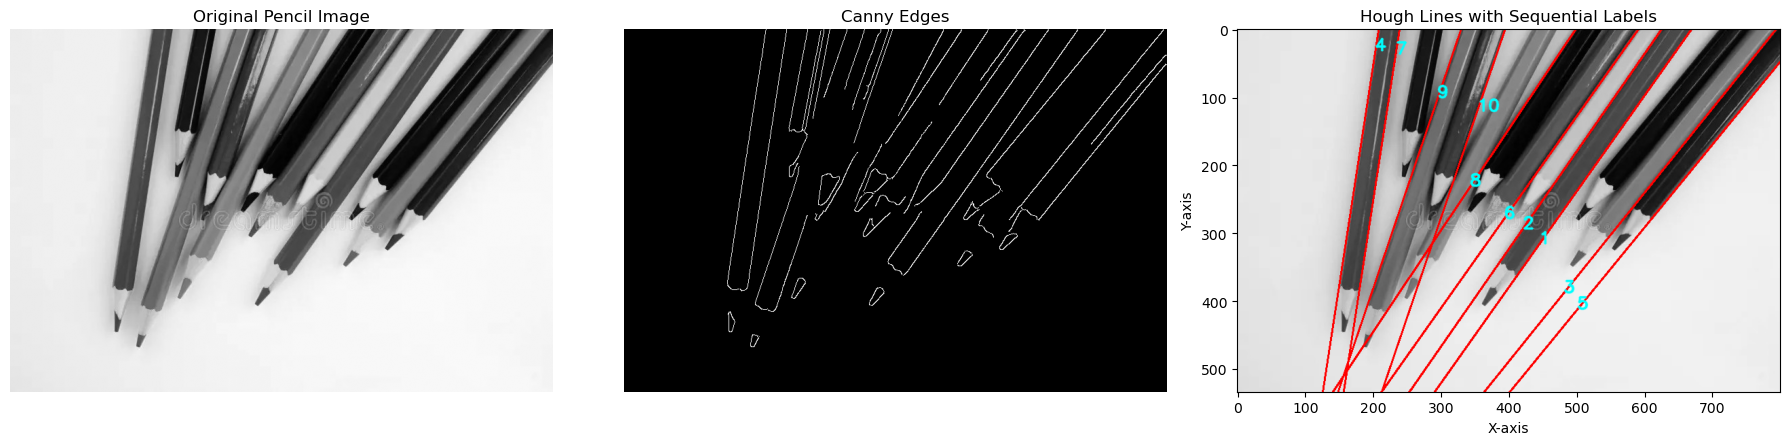

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import hough_line, hough_line_peaks

# --- Load and Prepare the Image ---
# Load the image and convert to grayscale
pencil_image = Image.open("pencils_image.jpg").convert("L")
pencil_image_array = np.array(pencil_image, dtype=np.uint8)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(pencil_image_array, (9, 9), 2)

# --- Edge Detection ---
# Use the Canny edge detector for robust edge detection
edges = cv2.Canny(blurred, 50, 150)

# --- Hough Line Detection using scikit-image ---
# Define a range of angles for the Hough transform
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)

# Compute the Hough Transform of the edge image
hspace, angles, dists = hough_line(edges, theta=tested_angles)

# Find peaks (i.e., the most prominent lines) in the Hough accumulator
accum, angles_peaks, dists_peaks = hough_line_peaks(hspace, angles, dists,
                                                    threshold=0.3 * np.max(hspace),
                                                    num_peaks=10)

# --- Print the parameters for each detected line with sequential numbering ---
for i, (accum_val, angle, dist) in enumerate(zip(accum, angles_peaks, dists_peaks), start=1):
    degree = angle * 180 / np.pi
    print(f"Line {i}: angle {angle:.2f} rad ({degree:.1f}°), distance {dist:.2f} has {accum_val} votes")

# --- Draw the Detected Lines with Sequential Annotations ---
# Create a color copy of the original image for drawing
line_image_color = cv2.cvtColor(pencil_image_array, cv2.COLOR_GRAY2BGR)

for i, (accum_val, angle, dist) in enumerate(zip(accum, angles_peaks, dists_peaks), start=1):
    # Compute the starting point (x0, y0) of the line in polar coordinates
    a = np.cos(angle)
    b = np.sin(angle)
    x0 = a * dist
    y0 = b * dist
    # Determine two points along the line (extended for visualization)
    pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
    pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
    cv2.line(line_image_color, pt1, pt2, (0, 0, 255), 2)  # Draw the line in red
    
    # Annotate the line with the sequential number
    cv2.putText(line_image_color, f"{i}", (int(x0), int(y0)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2, cv2.LINE_AA)

# --- Display the Results ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original image (axes turned off for clarity)
axs[0].imshow(pencil_image_array, cmap="gray")
axs[0].set_title("Original Pencil Image")
axs[0].axis("off")

# Edge image (axes turned off)
axs[1].imshow(edges, cmap="gray")
axs[1].set_title("Canny Edges")
axs[1].axis("off")

# Image with detected lines and sequential annotations (axes turned on)
axs[2].imshow(cv2.cvtColor(line_image_color, cv2.COLOR_BGR2RGB))
axs[2].set_title("Hough Lines with Sequential Labels")
axs[2].set_xlabel("X-axis")
axs[2].set_ylabel("Y-axis")
axs[2].axis("on")  # Show the axis with tick marks

plt.tight_layout()
plt.show()
